In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')

In [186]:
data = pd.read_csv("../data/yt_data.csv")

In [187]:
# Al ser la data leída desde otro archivo del preprocesado, convertimos trending_date a datetime 
data["trending_date"] = pd.to_datetime(data["trending_date"])

c:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Views totales por Dia de Trend')]

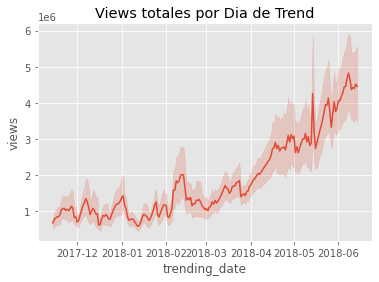

In [188]:
fig = sns.lineplot(data["trending_date"],data["views"])
fig.set(title="Views totales por Dia de Trend")

c:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


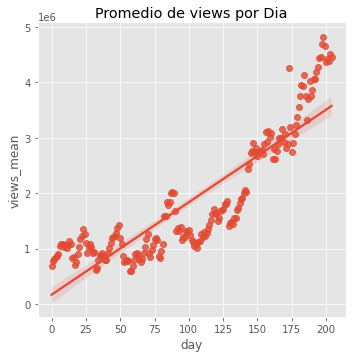

In [189]:
i = [i for i in range(205)]
y = data.groupby("trending_date")["views"].mean().values
df = pd.DataFrame({"day":i,"views_mean":y,"trending_date":data["trending_date"].unique()})
fig = sns.lmplot("day","views_mean",df)
fig.set(title="Promedio de views por Dia")

In [190]:
x = pd.DataFrame(i)
len(x)

205

In [191]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [192]:
slope = lm.coef_
intercept = lm.intercept_
print(slope)

[16279.59936329]


In [193]:
print("Las pendientes 'w1' del modelo son: ", slope)
print("El término independiente de la recta 'w0' es: ", intercept)

Las pendientes 'w1' del modelo son:  [16279.59936329]
El término independiente de la recta 'w0' es:  161428.2685234337


In [194]:
coef_df = pd.DataFrame(lm.coef_,x.columns,columns=["Coeficiente"])
coef_df

,Coeficiente
0,16279.599363
